In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Melbourne_housing_FULL.csv')

## Preprocessing the data

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
print('Number of columns:', len(df.columns))

Number of columns: 21


In [5]:
print('Dataframe shape:', df.shape)

Dataframe shape: (34857, 21)


In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [7]:
# Rename some columns
df = df.rename(columns={'Bedroom2': 'Bedroom', 'Lattitude': 'Latitude', 'Longtitude': 'Longitude', 'Landsize': 'LandSize', \
                       'Regionname': 'RegionName', 'Propertycount': 'PropertyCount'})

print('Dataframe columns:', df.columns)

Dataframe columns: Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car',
       'LandSize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude',
       'Longitude', 'RegionName', 'PropertyCount'],
      dtype='object')


In [8]:
# Consider only those properties that have been sold and remove outliers
df = df[(df['Method'] == 'S') & (df['LandSize'] > 10) & (df['YearBuilt'] > 1900) & (df['BuildingArea'] > 10)]

In [9]:
# Drop string features
df = df.drop(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'RegionName', 'PropertyCount'], axis=1)

In [10]:
print('Dataframe shape:', df.shape)

Dataframe shape: (5175, 12)


In [11]:
# Drop rows with at least one NaN value
df = df.dropna(how='any')

In [12]:
print('Dataframe shape:', df.shape)

Dataframe shape: (4555, 12)


In [13]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,LandSize,BuildingArea,YearBuilt,Latitude,Longitude
count,4555.000000,4.555000e+03,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000
mean,3.233809,1.085192e+06,12.838968,3114.593853,3.210977,1.670692,1.812514,606.693743,157.316021,1970.457739,-37.799191,144.994841
std,0.846859,6.171439e+05,6.883496,121.605107,0.854636,0.701344,0.942796,1178.707178,88.314742,30.134483,0.100741,0.131895
min,1.000000,1.850000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,15.000000,16.000000,1901.000000,-38.174360,144.423790
25%,3.000000,6.760000e+05,8.100000,3044.000000,3.000000,1.000000,1.000000,328.000000,110.000000,1950.000000,-37.865800,144.912000
50%,3.000000,9.050000e+05,11.700000,3082.000000,3.000000,2.000000,2.000000,555.000000,138.000000,1970.000000,-37.789000,145.008550
75%,4.000000,1.320000e+06,15.300000,3150.000000,4.000000,2.000000,2.000000,672.000000,183.000000,1999.000000,-37.732285,145.078945
max,12.000000,6.400000e+06,47.400000,3977.000000,12.000000,7.000000,10.000000,42800.000000,3112.000000,2018.000000,-37.407200,145.482730


## Change font sizes

In [14]:
# Set font sizes
params = {'legend.fontsize': 32,
         'axes.labelsize': 40,
         'axes.titlesize': 45,
         'xtick.labelsize': 32,
         'ytick.labelsize': 32,
         'lines.linewidth': 4}

plt.rcParams.update(params)

## Heatmap

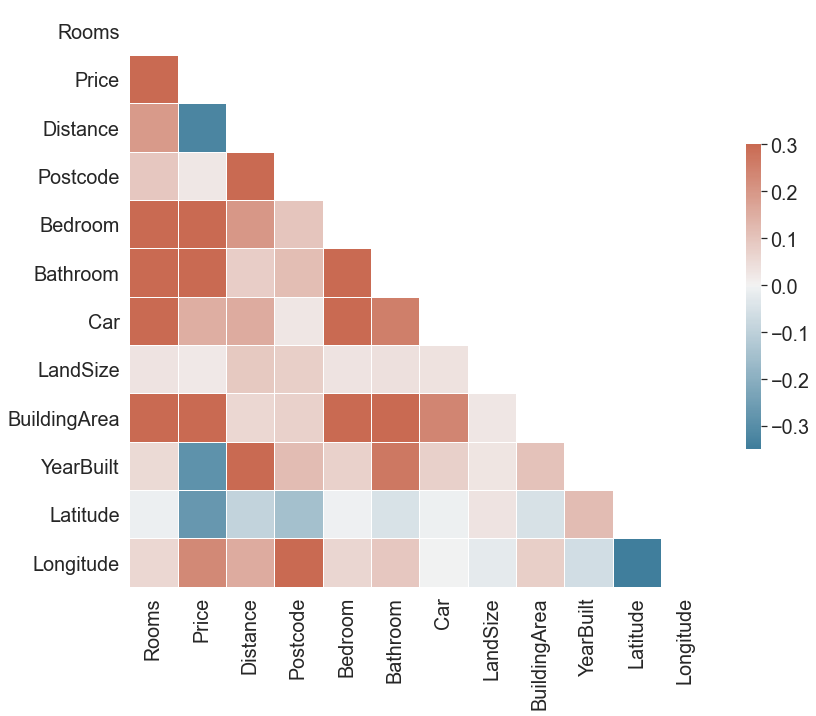

In [15]:
# Heatmap
sns.set_theme(style="white", font_scale=1.8)


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(13, 11.2))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

fig.savefig('./img/correlation_plot.png')
plt.show()

## Scatter plots for visualizing the data

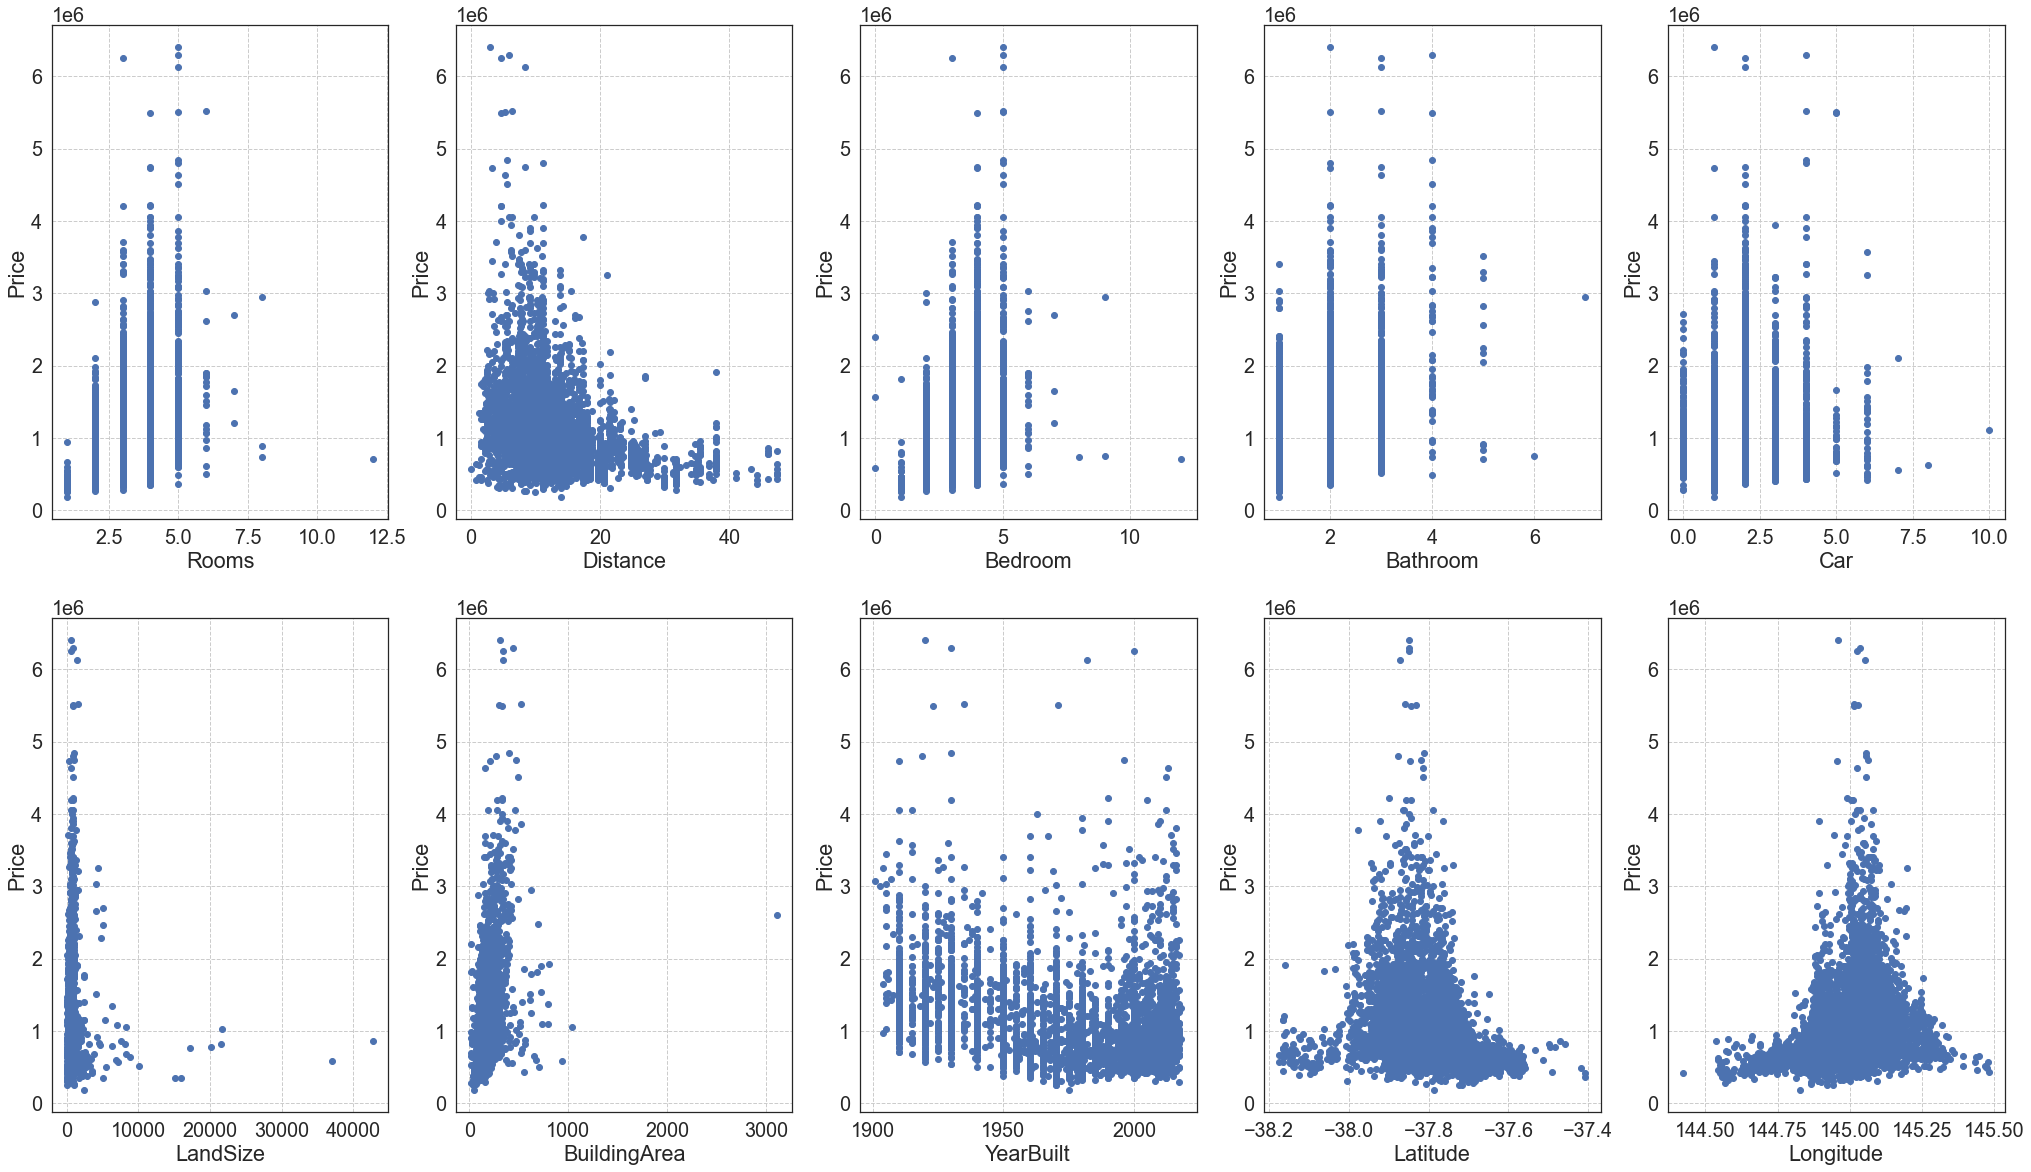

In [16]:
num_rows = 2
num_cols = 5
fig, ax = plt.subplots(num_rows, num_cols, figsize=(35, 20))

y = df['Price']

# Exclude price and postcode
df_2 = df.loc[:, ~df.columns.isin(['Price', 'Postcode'])]

for i in range(num_rows):
    for j in range(num_cols):
        col_name = df_2.columns[j + num_cols*i]
        X = df_2[[col_name]].to_numpy()
        
        ax[i][j].scatter(X, y)
        
        ax[i][j].set_xlabel(col_name)
        ax[i][j].set_ylabel('Price')
        ax[i][j].grid(True, linestyle='--')
        
fig.savefig('./img/scatter_plots.png')
plt.show()

## Split the data into train, validation and test sets with percentages 60, 20, 20.

In [17]:
from sklearn.model_selection import train_test_split

# Ignore Postcode from regression (and price which will be predicted)
X = df.drop(['Price', 'Postcode'], axis=1)
print('X columns:', X.columns)
y = df['Price']

X1, X_test, y1, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size=0.25, random_state=42)

X columns: Index(['Rooms', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'LandSize',
       'BuildingArea', 'YearBuilt', 'Latitude', 'Longitude'],
      dtype='object')


In [18]:
print('Median price, train:', np.median(y_train))
print('Median price, validation:', np.median(y_val))
print('Median price, test:', np.median(y_test))

Median price, train: 900000.0
Median price, validation: 903000.0
Median price, test: 922000.0


## Linear regression

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = linear_model.LinearRegression()

# Train and predict
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_val = lin_reg.predict(X_val)

# Median absolute errors
train_abs_error = np.abs(y_train - y_pred_train)
val_abs_error = np.abs(y_val - y_pred_val)
train_median_error = np.median(train_abs_error)
val_median_error = np.median(val_abs_error)

# Root mean squared errors
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

errors_mae = np.array([train_median_error, val_median_error])
errors_rmse = np.array([train_rmse, val_rmse])

print('Mean absolute error in price (train and validation):', errors_mae)
print('Root mean squared error in price (train and validation):', errors_rmse)
print('r2 score:', r2_score(y_val, y_pred_val))

Mean absolute error in price (train and validation): [185038.07279825 193341.11883977]
Root mean squared error in price (train and validation): [418987.83320106 415014.51591173]
r2 score: 0.5603983475551962


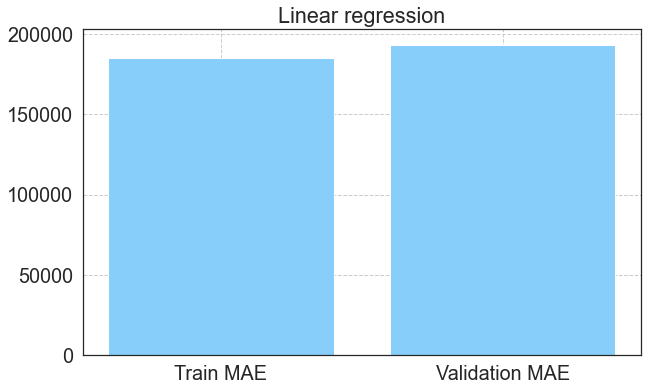

In [20]:
# Plot results from linear regression
plt.figure(figsize=(10, 6))
ind = np.arange(len(errors_mae))
plt.bar(ind, errors_mae, color='lightskyblue')
plt.xticks(ind, ('Train MAE', 'Validation MAE'))
plt.grid(True, linestyle='--')
plt.title('Linear regression')
plt.savefig('./img/lin_reg_errors.png')
plt.show()

## Random forest regression

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=200, max_features=3, max_depth=9)

# RandomForestRegressor expects 1D y-array instead of 2D --> flatten.
y_train_1d = y_train.to_numpy().flatten()
y_val_1d = y_val.to_numpy().flatten()

# Fit and predict
forest.fit(X_train, y_train_1d)
y_pred_train = forest.predict(X_train)
y_pred_val = forest.predict(X_val)

# Median absolute errors
train_abs_error = np.abs(y_train_1d - y_pred_train)
val_abs_error = np.abs(y_val_1d - y_pred_val)
train_median_error = np.median(train_abs_error)
val_median_error = np.median(val_abs_error)

errors_mae = np.array([train_median_error, val_median_error])
print('Mean absolute error in price (train and validation):', errors_mae)
print('r2 score:', r2_score(y_val_1d, y_pred_val))

Mean absolute error in price (train and validation): [ 86458.97075879 110425.27217688]
r2 score: 0.7904355174307084


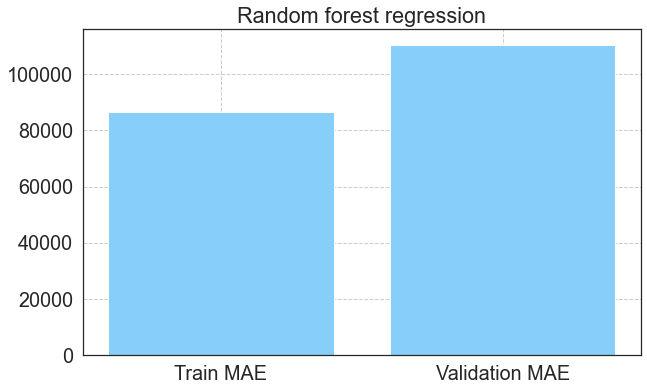

In [22]:
# Plot results from random forest regression
plt.figure(figsize=(10, 6))
ind = np.arange(len(errors_mae))
plt.bar(ind, errors_mae, color='lightskyblue')
plt.xticks(ind, ('Train MAE', 'Validation MAE'))
plt.grid(True, linestyle='--')
plt.title('Random forest regression')
plt.savefig('./img/rand_forest_reg_errors.png')
plt.show()

In [23]:
# Let's choose random forest regression because it has smaller validation error. Let's calculate the test error.

y_pred_test = forest.predict(X_test)

# Median absolute error
test_abs_error = np.abs(y_test - y_pred_test)
test_median_error = np.median(test_abs_error)

print('Test set median absolute error:', test_median_error)

Test set median absolute error: 111028.88492905884


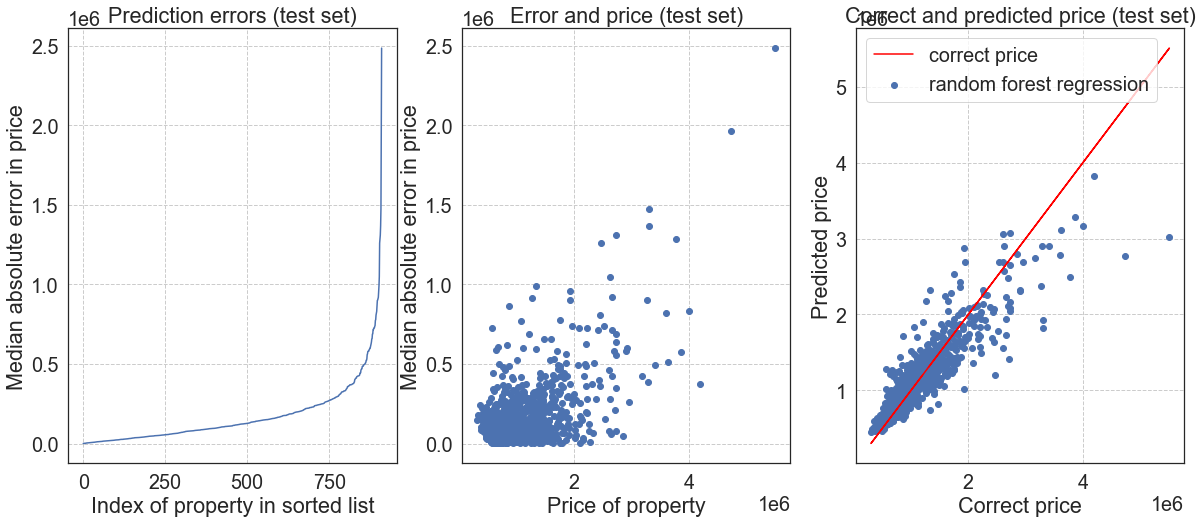

In [24]:
# Let's analyse how the errors behave

# Sort errors
sorted_test_errors = np.sort(test_abs_error)
len_test = len(sorted_test_errors)
range_test = np.arange(len_test)

fig, ax = plt.subplots(1, 3, figsize=(20, 8))

ax[0].plot(range_test, sorted_test_errors)
ax[0].set_xlabel('Index of property in sorted list')
ax[0].set_ylabel('Median absolute error in price')
ax[0].set_title('Prediction errors (test set)')
ax[0].grid(True, linestyle='--')

ax[1].scatter(y_test, test_abs_error)
ax[1].set_xlabel('Price of property')
ax[1].set_ylabel('Median absolute error in price')
ax[1].set_title('Error and price (test set)')
ax[1].grid(True, linestyle='--')

ax[2].scatter(y_test, y_pred_test, label='random forest regression')
ax[2].set_xlabel('Correct price')
ax[2].set_ylabel('Predicted price')
ax[2].set_title('Correct and predicted price (test set)')

ax[2].plot(y_test, y_test, color='red', label='correct price')
ax[2].legend()
ax[2].grid(True, linestyle='--')

fig.savefig('./img/results.png')
plt.show()